# Heart Disease Classification (Logistic Regression)

In this project, we'll be applying logistic regression to the Heart Disease Dataset from the UCI Machine Learning Repository to classify the presence of heart disease based on patient characteristics. We'll go through the full machine learning pipeline—exploring key predictors, building a classification model, and evaluating its performance to understand its strengths and limitations. This will be a great hands-on opportunity to practice working with real-world medical data while reinforcing important concepts like feature selection, model interpretation, and performance tuning.

## EDA and Feature Selection

### Load Data & View

Here our goal is to load in the data and get acquainted with the features. We will also be utilizing the [official dataset page](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) as a reference as to what certain features are describing.

In [944]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [945]:
heart = pd.read_csv('data/heart_disease.csv')

In [947]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [948]:
heart.describe(include='all')

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.458746
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,0.499120
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,1.000000


In [949]:
heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Something that initially stands out is that the `ca` and `thal` features are stores as objects. After referencing the official dataset page, we know that `ca` should be integers and `thal` describes categorical data. We will keep this in mind for further cleaning.

### Clean Nulls

#### Display Total Nulls

In [950]:
heart.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
present       0
dtype: int64

Although we see no null values, we must verify non-numeric columns to ensure there are no abnormalities.

#### Verify Column Frequency Distributions

Remembering earlier, we need to verify the unique values of `ca` and `thal`, as they are initially objects.

In [953]:
heart['ca'].value_counts(normalize=True)

ca
0.0    0.580858
1.0    0.214521
2.0    0.125413
3.0    0.066007
?      0.013201
Name: proportion, dtype: float64

In [954]:
heart['thal'].value_counts(normalize=True)

thal
3.0    0.547855
7.0    0.386139
6.0    0.059406
?      0.006601
Name: proportion, dtype: float64

#### Impute Missing

Since the `?` entries are basically nulls, we will impute them as such with the mode of the columns.

In [955]:
heart['ca'] = heart['ca'].replace('?', np.nan)
heart['thal'] = heart['thal'].replace('?', np.nan)

In [956]:
heart['ca'] = heart['ca'].fillna(heart['ca'].mode()[0])
heart['thal'] = heart['thal'].fillna(heart['thal'].mode()[0])

#### Check Null Count

In [957]:
heart.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
present       0
dtype: int64

Null values are still the same, however we know that the `ca` and `thal` columns are now processed, which we can verify.

In [979]:
heart['ca'].value_counts(normalize=True)

ca
0.0    0.594059
1.0    0.214521
2.0    0.125413
3.0    0.066007
Name: proportion, dtype: float64

In [980]:
heart['thal'].value_counts(normalize=True)

thal
3.0    0.554455
7.0    0.386139
6.0    0.059406
Name: proportion, dtype: float64

### Convert Types

We can now convert `ca` and `thal` to numeric data types without error.

In [958]:
heart['ca'] = pd.to_numeric(heart['ca'])
heart['thal'] = pd.to_numeric(heart['thal'])

### Drop Unnecessary

We also drop the index from the original dataset as it is unnecessary.

In [959]:
heart.drop(columns=['Unnamed: 0'], inplace=True)

### Check for Duplicated Rows

In [982]:
heart.duplicated().sum()

np.int64(0)

### Split Present and Non-Present

With the data cleaning out of the way, we can now shift towards interpreting our data.

Here we split the datasets into separate dataframes for present vs non-present cases. This helps to create comparison visualizations.

In [960]:
present_df = heart[heart['present'] == 1]
non_present_df = heart[heart['present'] == 0]

We will first check the distribution within our dataset to see if there is any potential bias.

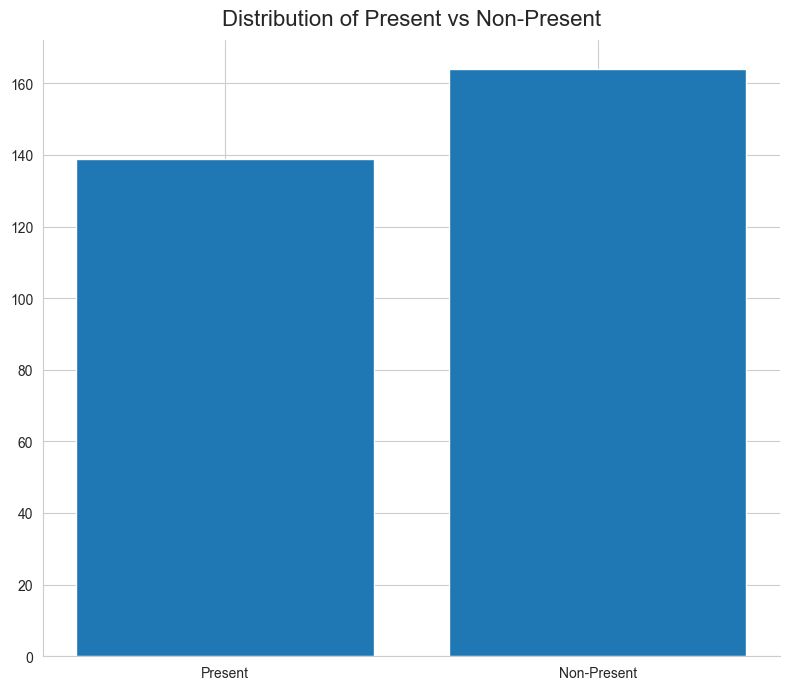

In [961]:
plt.figure(figsize=(8, 7))

plt.bar(range(2), [present_df.shape[0], non_present_df.shape[0]])
plt.title('Distribution of Present vs Non-Present', fontsize=16, y=1.01)

plt.xticks(range(2), ['Present', 'Non-Present'])

plt.tight_layout()
sns.despine()
plt.savefig('visualizations/distribution_of_present_vs_non_present.png', dpi=300)
plt.show()

As there are more entries for non-present cases, we should be careful for bias within training, making sure to double-check the distributions after splitting into training and testing data.

### Visualize

We will now visualize for potential features.

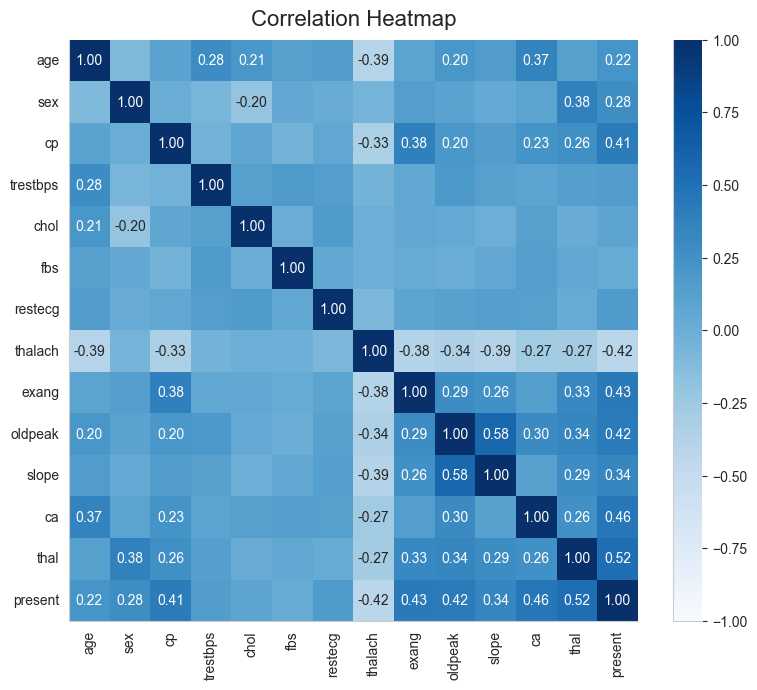

In [962]:
fig = plt.figure(figsize=(8, 7))
ax = sns.heatmap(heart.corr(numeric_only=True), cmap='Blues', vmin=-1, vmax=1, annot=True)

plt.title('Correlation Heatmap', fontsize=16, y=1.01)

for text in ax.texts:
    t = float(text.get_text())
    if (t < 0.2) & (t > -0.2):
        text.set_text('')
    else:
        text.set_text(f'{t:.2f}')

plt.tight_layout()
sns.despine()
plt.savefig('visualizations/correlation_heatmap.png', dpi=300)
plt.show()

We can see within the correlation heatmap that there are a couple of potential features with moderate levels of correlation. We can verify this with a simple correlation table, sorted from highest correlation.

In [963]:
abs(heart.corr(numeric_only=True)['present']).sort_values(ascending=False)[1:]

thal        0.522057
ca          0.460033
exang       0.431894
oldpeak     0.424510
thalach     0.417167
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
Name: present, dtype: float64

We can now see the most-to-least impactful features for discerning the target variable. We will focus on all of them up until the 3rd to last (from `thal` to `trestbps`), and see if we can identify any easily-classifiable features through comparison histograms.

In [964]:
# Isolate the features that we are interested in visualizing
cols_to_check = abs(heart.corr(numeric_only=True)['present']).sort_values(ascending=False)[1:-2].index.tolist()

Here we will utilize subplots to easily display histograms comparing present vs. non-present cases, with visualizations for each column.

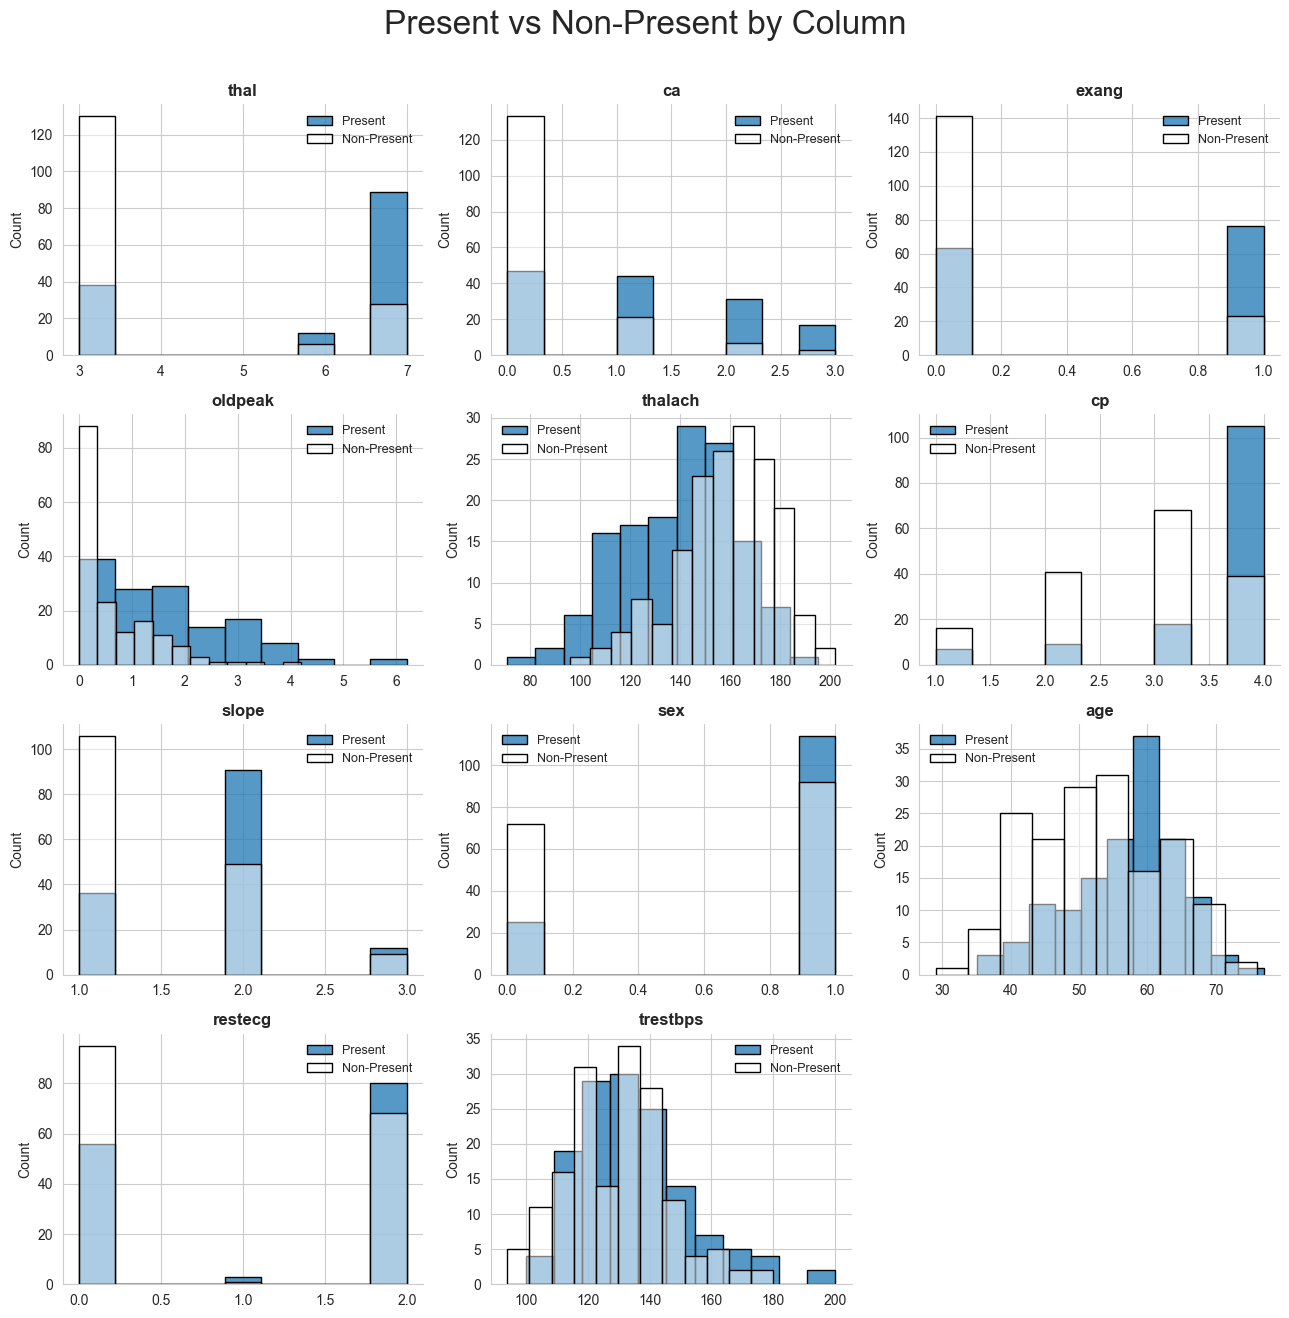

In [965]:
fig = plt.figure(figsize=(13, 13))
fig.suptitle('Present vs Non-Present by Column', fontsize=24, y=1.01)

for i, col in enumerate(cols_to_check):
    if i <= len(cols_to_check):
        ax = fig.add_subplot(4, 3, i + 1)
        sns.histplot(data=present_df, x=col, ax=ax, edgecolor='black', label='Present')
        sns.histplot(
            data=non_present_df, x=col, ax=ax, alpha=0.5, color='white', edgecolor='black', label='Non-Present'
        )
        plt.legend(loc='best', fontsize=9, frameon=False)
        ax.set_title(col, fontsize=12, fontweight='bold')
        ax.set_xlabel('')
    else:
        break

plt.tight_layout()
sns.despine()
plt.savefig('visualizations/present_vs_non_present_by_column.png', dpi=300)
plt.show()

We will use `thal`, `ca`, and `cp` after viewing the results of the heatmap, correlation table, and histogram distributions per present vs non-present. We can see clearer distinctions in the plots, suggesting easier classification for the model compared to other potential features.

We also can try `age` if we want further on, as domain knowledge tells us that the elderly are inherently more likely to have heart disease.

EDIT: After attempting various different features, we have included `oldpeak` as it provides the most accuracy, sensitivity, and specificity.

In [966]:
features = ['thal', 'ca', 'cp', 'oldpeak']

## Data Splitting

Let's split the data by 80%/20%. After testing out multiple `random_state` seeds, we will settle on 2837 as it yielded the most balanced distribution of our target variable witin our training set.

In [967]:
from sklearn.model_selection import train_test_split

X = heart[features]
y = heart['present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2837)

In [968]:
y_train.value_counts()

present
0    123
1    119
Name: count, dtype: int64

In [969]:
y_test.value_counts()

present
0    41
1    20
Name: count, dtype: int64

## Model Building

### Initialize and Fit

In [970]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [971]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

### Create Predictions on Training Data

In [972]:
train_predictions = model.predict(X_train)

### Print Metrics

In [973]:
tp = ((train_predictions == 1) & (y_train == 1)).sum()
tn = ((train_predictions == 0) & (y_train == 0)).sum()
fp = ((train_predictions == 0) & (y_train == 1)).sum()
fn = ((train_predictions == 1) & (y_train == 0)).sum()

accuracy = model.score(X_train, y_train)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Accuracy: {accuracy:.2f}\nSensitivity: {sensitivity:.2f}\nSpecificity: {specificity:.2f}')

Accuracy: 0.83
Sensitivity: 0.84
Specificity: 0.81


### Examine Coefficients

In [974]:
features

['thal', 'ca', 'cp', 'oldpeak']

Our features describe:

thal - thalium stress test

ca - number of major blood vessels colored by flouroscopy

cp - Constrictive Pericarditis (the sac surrounding the heart (pericardium) becomes thickened and scarred)

oldpeak - ST depression induced by exercise relative to rest

In [975]:
log_odds = np.log(model.coef_[0])
odds_ratio = np.exp(log_odds)

print(f'Log Odds: {log_odds.round(3)}\nOdds Ratio: {odds_ratio.round(3)}')

Log Odds: [-0.796  0.128 -0.349 -0.481]
Odds Ratio: [0.451 1.137 0.705 0.618]


The odds ratios suggest that for our features exhibit the following effect on probability for heart disease-presence, holding all other features constant.

**thal** (0.451) - Higher stress test results indicate lower odds of having heart disease.

**ca** (1.137) - Higher number of colored blood vessels indicate higher odds of having heart disease.

**cp** (0.705) - Exhibiting Constrictive Pericarditis indicates lower odds of having heart disease.

**oldpeak** (0.618) - higher amounts ST Depression induced by exercise indicate lower odds of having heart disease.

### Predict on Test Data

In [976]:
y_pred = model.predict(X_test)

In [977]:
tp = ((y_pred == 1) & (y_test == 1)).sum()
tn = ((y_pred == 0) & (y_test == 0)).sum()
fp = ((y_pred == 0) & (y_test == 1)).sum()
fn = ((y_pred == 1) & (y_test == 0)).sum()

accuracy = model.score(X_test, y_test)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Accuracy: {accuracy:.2f}\nSensitivity: {sensitivity:.2f}\nSpecificity: {specificity:.2f}')

Accuracy: 0.87
Sensitivity: 0.75
Specificity: 0.95


In [978]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        41
           1       0.75      0.90      0.82        20

    accuracy                           0.87        61
   macro avg       0.85      0.88      0.86        61
weighted avg       0.88      0.87      0.87        61



## Conclusion and Recommendations

Our model is less accurate in predicting true values in cases where heart disease is present (sensitivity). However, the model is very accurate in predicting non-presence in cases where heart disease is not present (specificity). We saw this partially within our distribution comparison of the present vs. non-present cases, in which there was a slight bias towards non-presence within the data. Our results could also suggest that our features are more indicative of a lack of heart-disease rather than the presence of one, and could be introducing bias towards non-presence. 

This bias is reflected in our odds ratio findings, where most features (thal, cp, and oldpeak) are more indicative of non-presence, while the only feature associated with higher odds (ca) has a relatively weak effect. As a result, the model is more confident in ruling out heart disease than in identifying true cases, contributing to low sensitivity. Addressing this could involve incorporating stronger predictive features, rebalancing the dataset if necessary, and adjusting classification thresholds to improve sensitivity without significantly impacting specificity.

**Recommendation**: Moving forward, we should look into adding stronger predictive features, such as cholesterol levels, blood pressure, or diabetes status, to give the model more information to work with. It's also worth checking for any class imbalance and considering oversampling techniques if needed. On the modeling side, testing tree-based approaches could help capture more complex relationships that might be getting lost with logistic regression.